## Parametry

In [30]:
MODEL_NAME = "trained_model_type2.h5"
LEARNING_RATE = 0.001

## Wczytanie modelu z pliku

In [31]:
from tensorflow.keras.models import load_model
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import LeakyReLU
from script.main.loss_functions import *

model = load_model('../resources/%s' % MODEL_NAME, compile=False, custom_objects={'LeakyReLU': LeakyReLU})
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 71, 55)            24420     
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                24420     
_________________________________________________________________
dense (Dense)                (None, 19)                1064      
Total params: 49,904
Trainable params: 49,904
Non-trainable params: 0
_________________________________________________________________


## Wczytanie danych testowych z pliku

In [32]:
import numpy as np

X_test = np.load("../resources/test_data/X_test.npy")
Y_test = np.load("../resources/test_data/Y_test.npy")
test_series = np.load("../resources/data_float32_series_144_compression_137.npy")

## Wyliczenie prognoz na 72h wprzód

In [33]:
#### print(test_series.shape)
preds = np.array(test_series, copy=True)
for i in range(72):
    print(i)
    preds[:,72+i,:18] =  model.predict(preds[:,i:71+i,:])[:,:18]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


## Porównanie z prawdziwymi pomiarami i wyliczenie błędów

### Średni błąd całego wektora

(12576, 144, 55)
[0.14118224 0.14334445 0.19420066 0.1958975  0.23437268 0.23381835
 0.26392919 0.25907835 0.28282875 0.27784351 0.29708138 0.29234859
 0.30770302 0.30384684 0.31614164 0.31252772 0.3241629  0.32196727
 0.33293584 0.33099434 0.34304366 0.34001186 0.35288516 0.35026982
 0.36496493 0.36065045 0.3764686  0.3731834  0.38633129 0.38399196
 0.39595062 0.39411449 0.4039503  0.40242514 0.41058576 0.40706894
 0.41442755 0.41208625 0.41990995 0.41772255 0.42342636 0.42018497
 0.42383456 0.421229   0.42562547 0.42322549 0.42985651 0.42693886
 0.43383804 0.43243563 0.43968934 0.43752062 0.44511476 0.4425399
 0.44962552 0.44656047 0.45135126 0.449139   0.45554227 0.45190889
 0.45859742 0.45424244 0.46189997 0.45753416 0.46313447 0.46015844
 0.46506998 0.4611834  0.4653579  0.4631637  0.46804863 0.46349788]


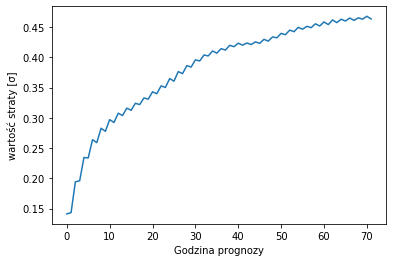

In [34]:
import matplotlib.pyplot as plt
from script.main.loss_functions import *
print(preds.shape)
losses = np.zeros(72)

for i in range(72):  
    losses[i]  = error_on_series(preds[:,72+i,:], test_series[:,72+i,:])
print(losses)
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd opadów

[0.24184942 0.26180848 0.26939088 0.27278942 0.27087015 0.2803075
 0.29053065 0.27189788 0.27263379 0.2663821  0.27208418 0.26791623
 0.25518924 0.24874036 0.24580546 0.25604975 0.26580372 0.2702089
 0.27336866 0.28240612 0.27066755 0.26784298 0.27340874 0.2785165
 0.27409342 0.26538908 0.25934482 0.26350304 0.25664169 0.24643752
 0.24968955 0.25348017 0.25304878 0.26493198 0.2651149  0.25346974
 0.25914839 0.24901696 0.27239272 0.25546539 0.27197635 0.27123344
 0.27021801 0.26299235 0.24645342 0.24927044 0.25286111 0.25197974
 0.23808999 0.24993159 0.2567943  0.25895277 0.27011827 0.25371355
 0.25631317 0.26984859 0.26030883 0.26017407 0.25468883 0.24609305
 0.24617323 0.25010279 0.24709204 0.2608234  0.24945721 0.25731331
 0.25187898 0.2480792  0.24183361 0.25522932 0.2517935  0.2420987 ]


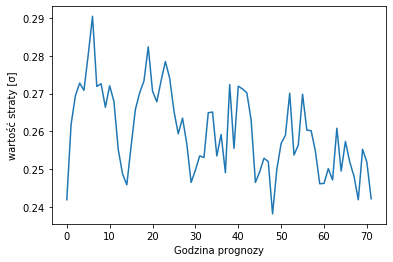

In [35]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_rain(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)
print(losses)
plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd temperatury

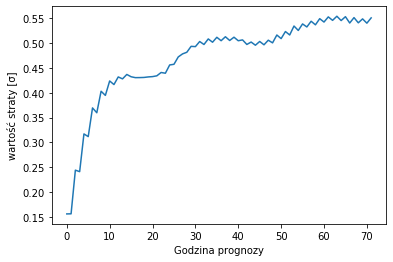

In [36]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_temp(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na Wet Bulb

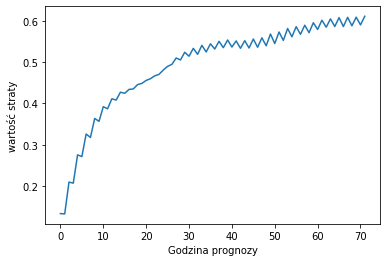

In [37]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_wetb(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses, label = "WTB")

plt.ylabel('wartość straty')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd temperatury w punkcie rosy

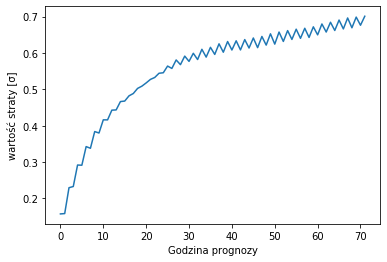

In [38]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_dewpt(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd wilgotności

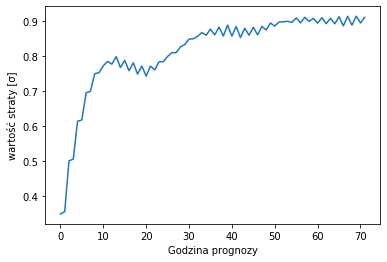

In [39]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_rhum(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na cisnieniu

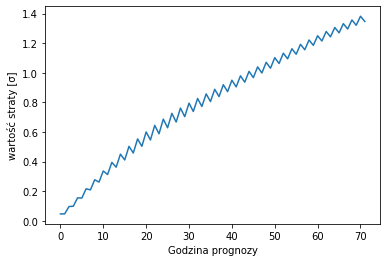

In [40]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_msl(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na prędkości wiatru

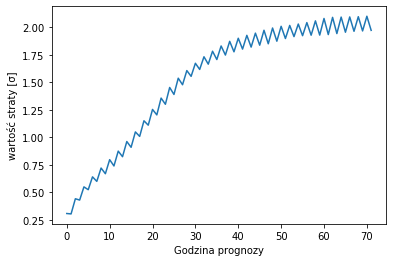

In [41]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_wdsp(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na nasłonecznieniu

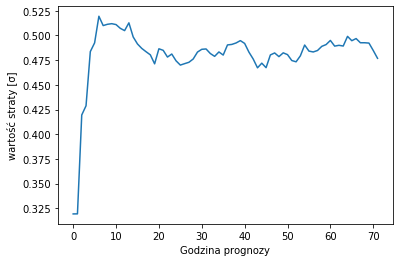

In [42]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_sun(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na widoczności

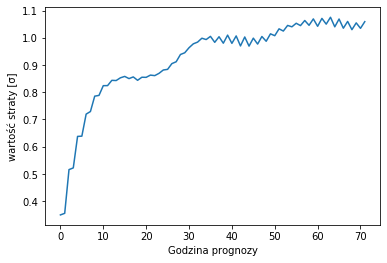

In [43]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_vis(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Średni błąd na kodzie synoptycznym

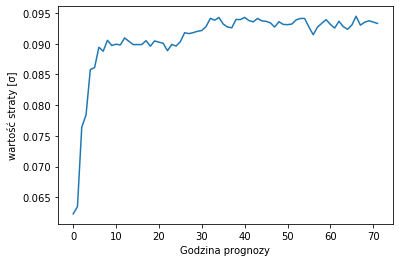

In [44]:
losses = np.zeros(72)
for i in range(72):
    losses[i]  = error_on_weather_code(preds[:,72+i,:], test_series[:,72+i,:])
plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Wszystkie poarametry naraz

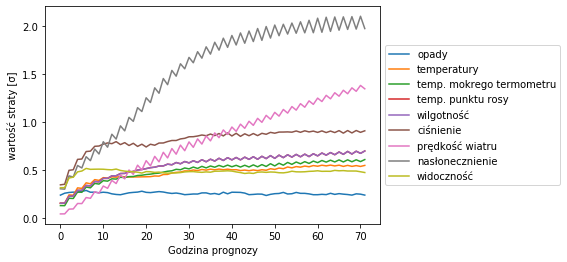

In [45]:
names = ['opady', 'temperatury', 'temp. mokrego termometru', 'temp. punktu rosy', 'wilgotność', 'ciśnienie', 
         'prędkość wiatru', 'nasłonecznienie', 'widoczność', 'kod synoptyczny']
functs = [error_on_rain, error_on_temp, error_on_wetb, error_on_dewpt, error_on_dewpt,
          error_on_rhum, error_on_msl, error_on_wdsp, error_on_sun, error_on_vis, error_on_weather_code]

for param in range(9):
    losses = np.zeros(72)
    for i in range(72):
        losses[i]  = functs[param](preds[:,72+i,:], test_series[:,72+i,:])
    plt.plot(range(0,72), losses, label = names[param])



plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




### Porównanie błędu w sezonach

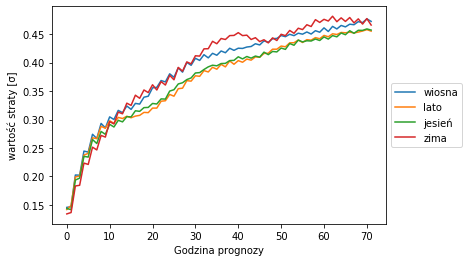

In [46]:
names = ['wiosna', 'lato', 'jesień', 'zima']
functs = [filter_spring, filter_summer, filter_autumn, filter_winter]
for param in range(4):
    month_preds = preds[np.where(functs[param](preds))]
    month_vals = test_series[np.where(functs[param](test_series))]
    losses = np.zeros(72)
    for i in range(72):
        losses[i]  = error_on_series(month_preds[:,72+i,:] , month_vals[:,72+i,:])
    plt.plot(range(0,72), losses, label = names[param])



plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Porównanie błędu w godzinach

(526, 144, 55)
(526, 144, 55)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


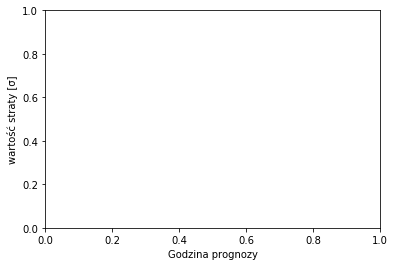

In [52]:

import matplotlib.pyplot as plt
from script.main.loss_functions import *
losses = np.zeros(24)
print(preds[np.where(filter_hour(preds[:,72,:], 20))].shape)
print(test_series[np.where(filter_hour(test_series[:,72,:], 20))].shape)

for i in range(24):  
    losses[i]  = error_on_series(preds[np.where(filter_hour(preds[:,100,:], i))], test_series[np.where(filter_hour(test_series[:,100,:], i))])
    
    
print(losses)
#plt.plot(range(0,72), losses)

plt.ylabel('wartość straty [σ]')
plt.xlabel('Godzina prognozy')
plt.show()

### Ewaluacja testowego błędu

In [53]:
results = model.evaluate(X_test, Y_test, batch_size=32)
print('test loss, test acc:', results)

25348/25348 [==============================] - 15s 584us/sample - loss: 0.1061 - accuracy: 0.6915
test loss, test acc: [0.10609823622659532, 0.69145495]
